# 1. Perkenalan

Nama : Gentur Herlambang

Batch : FTDS-017-RMT

Dataset : data pengguna kartu kredit dan pengguna yang default ( gagal bayar hutang)

Objective : ada beberapa objektif yang igin di capai pada ekplorasi dan pembuatan model kali ini yaitu:
-  mencari tahu trend atau target utama kostumer kartu kredit
- mencari tahu segment mana yang paling rentan terhadap default
- melihat sector mana yang dapat di tingkatkan untuk kenyaman kostumer
- melihat performa kredit kita
- mencari tahu porspek oprtunity kedepanya
- membuat model yang dapat memprediksi sesorang akan default atau tidak.

SELECT  
 limit_balance, cast(sex as int)as sex, cast(education_level as int)as education_level , cast(marital_status as int) as martial_status, age, pay_0, pay_2, pay_3, pay_4, cast(pay_5 as decimal) as pay_5, cast(pay_6 as decimal) as pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, cast(default_payment_next_month as int)  as default_payment_next_month  

 FROM `bigquery-public-data.ml_datasets.credit_card_default`  
 
 LIMIT 33864  

# 2.Import Libraries

In [48]:
import pandas as pd ## Import libararies yang akan di pakai
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
import pickle
import json
	

# 3. Data Loading

Load data

In [49]:
df=pd.read_csv(r'K:\Hack8 Data Science\Phase 1\Milestone\Milestone 1\h8dsft_P1M1_Gentur_Herlambang.csv') ##Menload data 

menapilkan 10 data pertama

In [50]:
df.head(10) # 10 data pertama

,limit_balance,sex,education_level,martial_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
1,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,...,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
2,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0,...,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
3,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0,...,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
4,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0,...,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0
5,500000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,...,152365.0,139757.0,153348.0,20000.0,20241.0,20154.0,20019.0,20151.0,20037.0,0
6,50000.0,1,2,1,40.0,0.0,0.0,0.0,0.0,0,...,44356.0,19344.0,19354.0,1691.0,1942.0,1296.0,674.0,693.0,1000.0,0
7,100000.0,1,5,1,45.0,0.0,0.0,0.0,0.0,0,...,90500.0,82586.0,22620.0,5000.0,5000.0,3203.0,2103.0,50000.0,0.0,0
8,140000.0,1,2,1,29.0,0.0,0.0,0.0,0.0,0,...,132038.0,131961.0,124256.0,6696.0,5000.0,4866.0,5300.0,5055.0,5000.0,0
9,50000.0,1,2,1,43.0,0.0,0.0,0.0,0.0,0,...,48934.0,29116.0,28999.0,1800.0,2200.0,1400.0,582.0,580.0,30000.0,0


menapilkan 10 data terakhir

In [51]:
df.tail(10) # 10 data terakhir

,limit_balance,sex,education_level,martial_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,300000.0,2,2,1,28.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,1000.0,16666.0,0.0,0.0,0.0,0.0,0
2956,200000.0,2,1,1,49.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,0.0,103.0,0.0,0.0,0.0,225.0,0
2957,50000.0,2,1,2,31.0,-1.0,0.0,-1.0,-1.0,-1,...,3995.0,0.0,0.0,30018.0,12787.0,3995.0,0.0,0.0,0.0,0
2958,50000.0,2,1,2,25.0,-1.0,-1.0,2.0,-1.0,-1,...,10610.0,0.0,0.0,5000.0,200.0,10610.0,0.0,0.0,0.0,0
2959,100000.0,2,1,2,37.0,-1.0,-1.0,0.0,-1.0,-1,...,780.0,0.0,0.0,21711.0,1000.0,780.0,0.0,0.0,0.0,0
2960,30000.0,2,3,2,50.0,-1.0,-1.0,2.0,-1.0,-1,...,1110.0,0.0,0.0,1860.0,0.0,1110.0,0.0,0.0,0.0,1
2961,20000.0,2,1,2,25.0,-1.0,-1.0,-1.0,-1.0,-1,...,640.0,0.0,0.0,0.0,855.0,640.0,0.0,0.0,2742.0,0
2962,280000.0,2,1,2,52.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,0.0,930.0,0.0,0.0,0.0,0.0,0
2963,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2964,100000.0,2,1,2,30.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,35993.0,2772.0,0.0,0.0,0.0,0.0,0


In [52]:
df.columns

Index(['limit_balance', 'sex', 'education_level', 'martial_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month'],
      dtype='object')

Membuat copy data agar data asli aman 

In [53]:
kredit=df.copy() ## copy data
kredit

,limit_balance,sex,education_level,martial_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
1,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,...,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
2,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0,...,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
3,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0,...,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
4,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0,...,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,30000.0,2,3,2,50.0,-1.0,-1.0,2.0,-1.0,-1,...,1110.0,0.0,0.0,1860.0,0.0,1110.0,0.0,0.0,0.0,1
2961,20000.0,2,1,2,25.0,-1.0,-1.0,-1.0,-1.0,-1,...,640.0,0.0,0.0,0.0,855.0,640.0,0.0,0.0,2742.0,0
2962,280000.0,2,1,2,52.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,0.0,930.0,0.0,0.0,0.0,0.0,0
2963,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0


Check mising value

In [54]:
kredit.isnull().sum() # check missing value

limit_balance                 0
sex                           0
education_level               0
martial_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

tidak ada missing value

mengganti nama target karena terlalu panjang

In [55]:
kredit.rename(columns={'default_payment_next_month':'default'}, inplace=True) # nama terget kepanjangan

In [81]:
df.shape

(2965, 24)

# 4. EDA

Sebelum melakukan EDA berikut adalah penjelasan dari parameter data:

ID: ID of each client  
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit  
SEX: Gender (1=male, 2=female)  
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)  
MARRIAGE: Marital status (1=married, 2=single, 3=others)  
AGE: Age in years  
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)  
PAY_2: Repayment status in August, 2005 (scale same as above)    
PAY_3: Repayment status in July, 2005 (scale same as above)  
PAY_4: Repayment status in June, 2005 (scale same as above)    
PAY_5: Repayment status in May, 2005 (scale same as above)  
PAY_6: Repayment status in April, 2005 (scale same as above)    
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)  
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)  
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)  
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)  
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)  
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)  
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)  
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)  
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)  
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)  
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)  
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)  
default.payment.next.month: Default payment (1=yes, 0=no)  

In [56]:
def central_plot(df,variable): ## membuat variabel central tendencyes
    print(variable) 
    print ("median:",df[variable].median())
    print ("mean:",df [variable].mean())
    print ("mode:",df [variable].mode()[0])
    print ("skew:",df [variable].skew())
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], kde=True, bins=30)
    plt.title('central tendencies')

Check persebaran limit balance

limit_balance
median: 140000.0
mean: 163369.30860033727
mode: 50000.0
skew: 1.0004416437793326


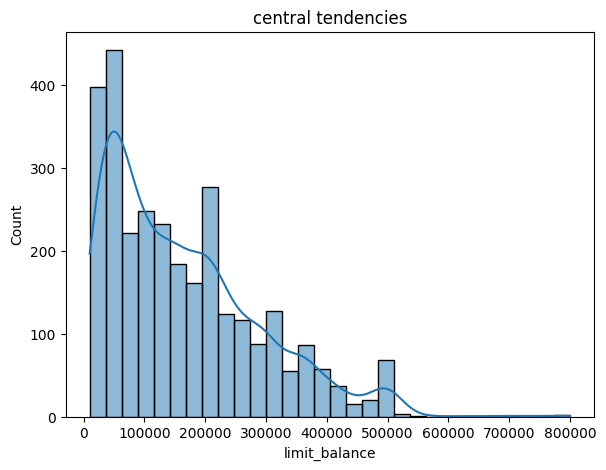

In [57]:
central_plot(kredit, 'limit_balance') # check kredit limit

Sebagaian besar pengguna kredit memiliki limit antara 5000-20000

Check persebaran umur pengguna kredit

age
median: 34.0
mean: 35.19325463743676
mode: 30.0
skew: 0.7728871800647298


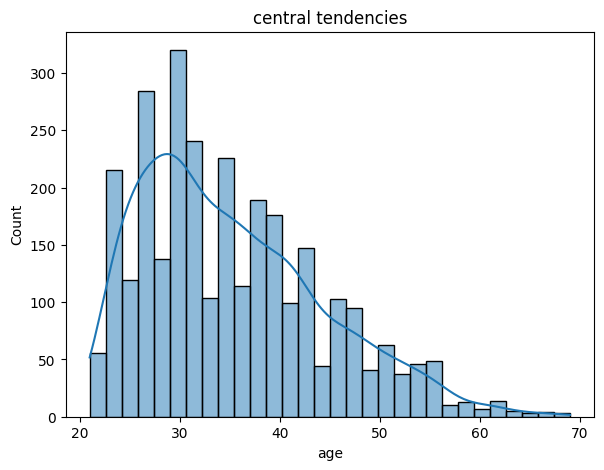

In [58]:
central_plot(kredit, 'age')# check kredit limit

sebagian besar pengguna kredit berumur anatar akhir 20an sampai awal 30an

Text(0.5, 1.0, 'education level')

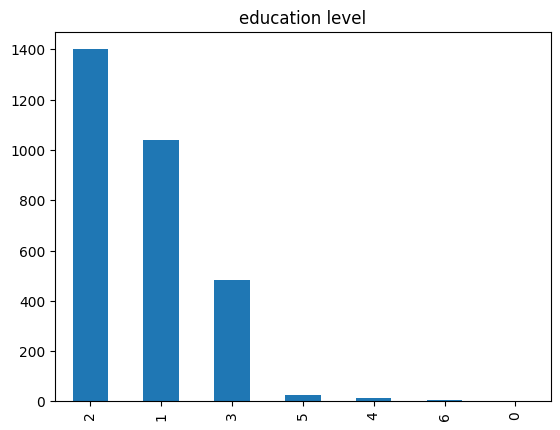

In [59]:
kredit['education_level'].value_counts().plot.bar() # cek persebaran pendidikan pengguna
plt.title('education level')

Sebagian besar pengguna kredit adalah lulusan kuliah yang menggabarkan mereka memiliki jenjang karir yang bagus

selanjutnya akan melihat persebaran waktu pembayaran

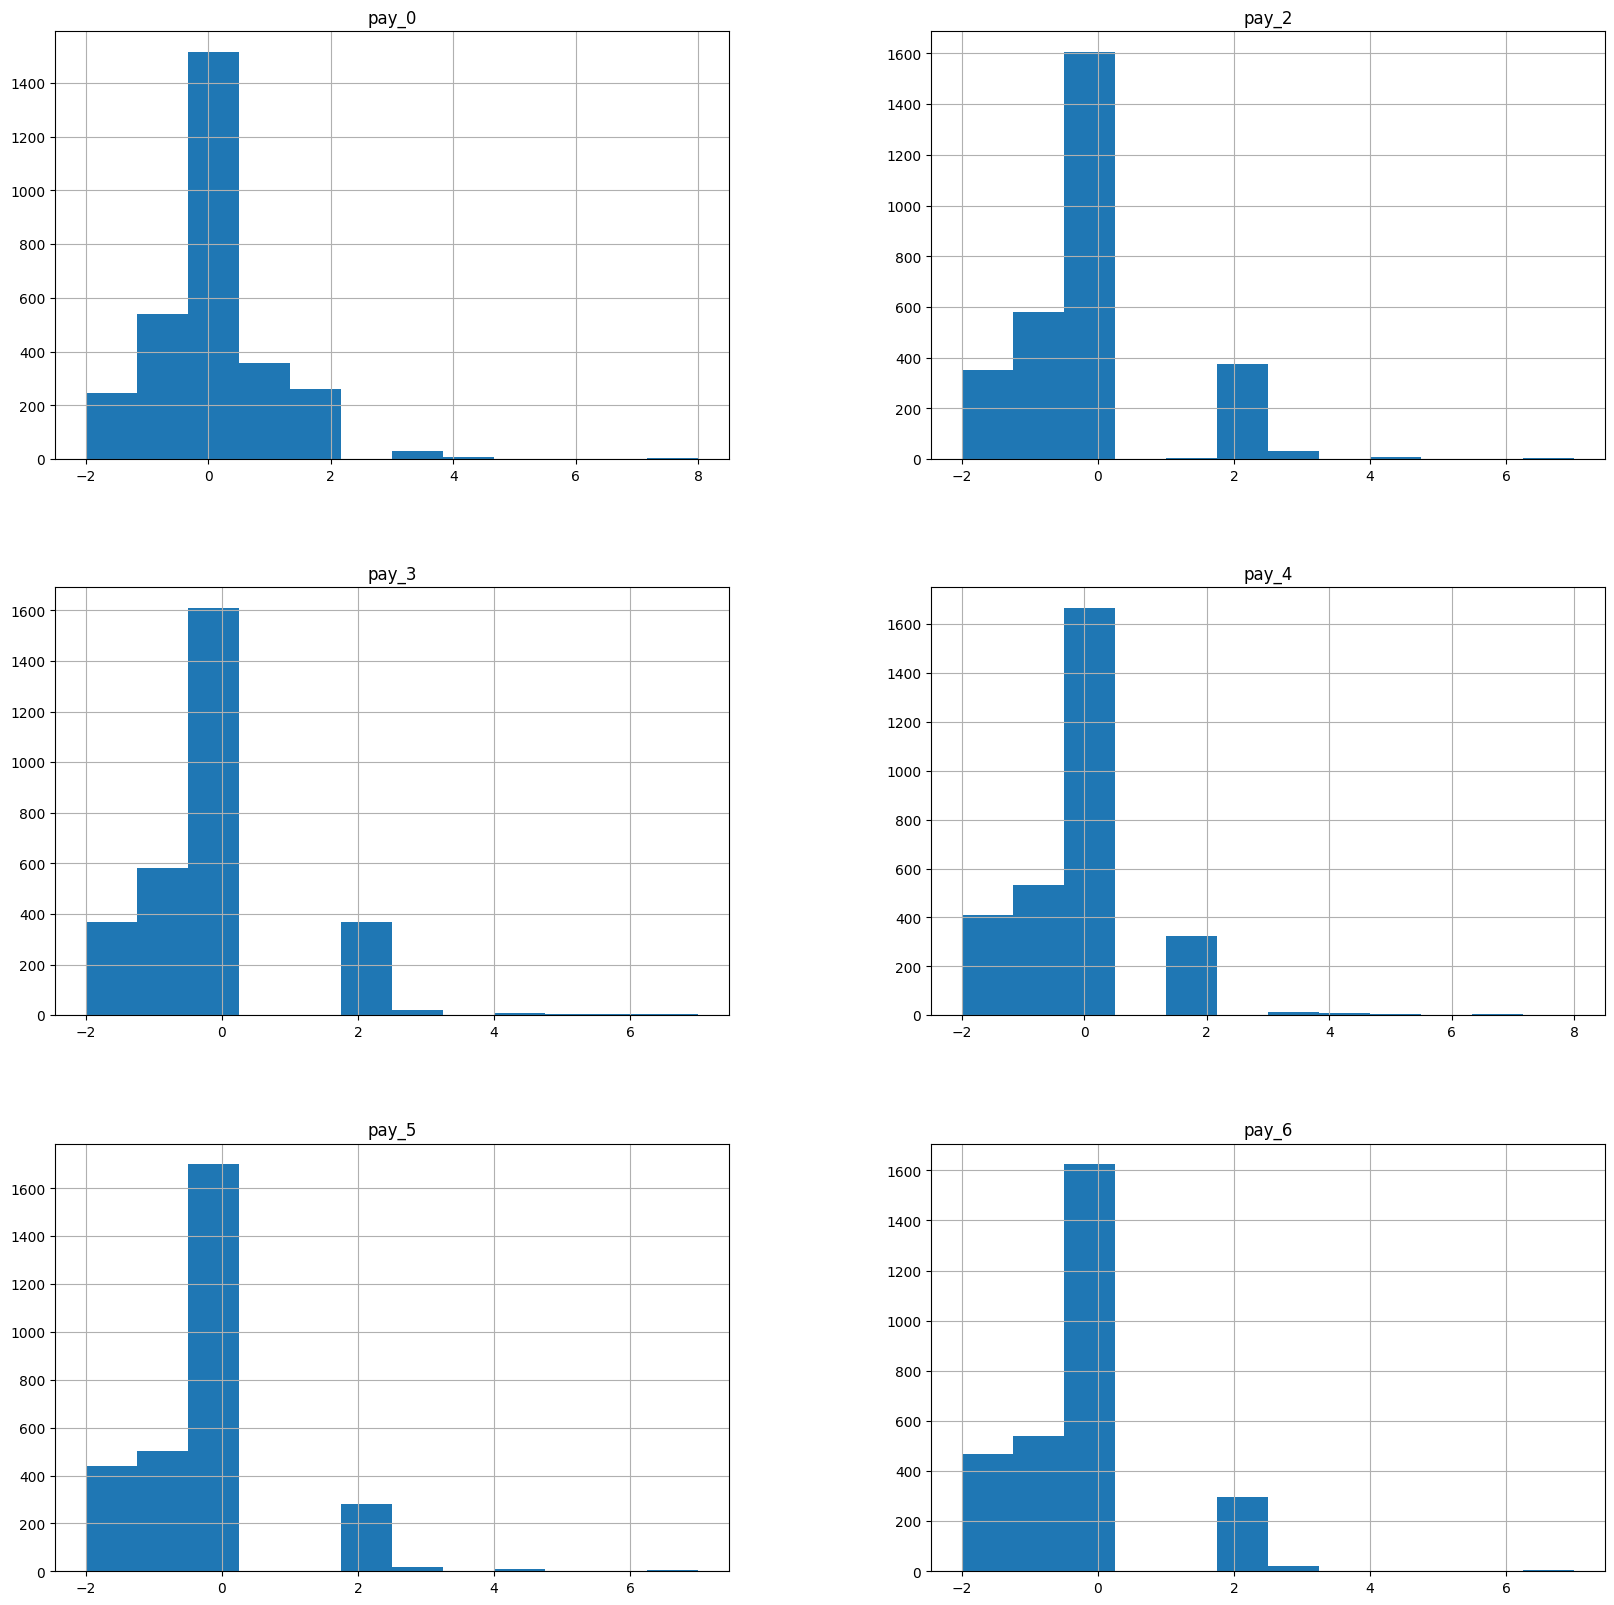

In [60]:
pay=kredit[['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']] ## cek ketapatan pembayaran
pay.hist(figsize = (20, 20), bins = 12, legend = False, grid = True);

terlihat di pay_0 ada banyak pemabayaran yang telat , tetapi di pemabayaran selanjutnya angka tersebut sudah berkurang ini bisa di asumsikan bhwa pada pengunaan kredit pengguna masih binung dalam melkaukan pembayaran . hal ini bisa mejadi opurtunity kita untuk melakukan imporvemnt untuk costumer kita. Akan tetapi selama periode 6 bulan ini masih terdapat beberapa costumer yang selalu telat melakukan pembayaran antara 2-4 bulan.

selanjutnya akan melihat persebaran gender pengguna

Text(0.5, 1.0, 'credit by gender')

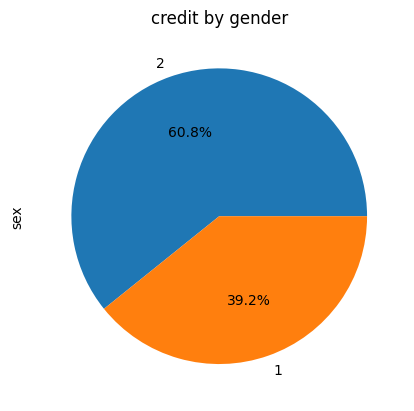

In [61]:
kredit['sex'].value_counts().plot.pie(autopct='%1.1f%%') # persebaran gender
plt.title('credit by gender')

berdasarkan data pengguna 39% laki-laki dan 61% adalah wanita

kemudain akan melihat default rate

Text(0.5, 1.0, 'default')

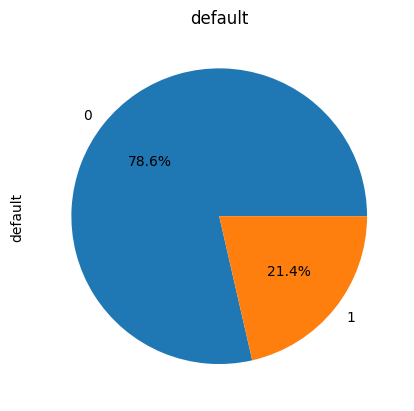

In [62]:
kredit['default'].value_counts().plot.pie(autopct='%1.1f%%') # default rate
plt.title('default')

 Berdasarkan data 78.6% pengguna tidak akan default pada bulan selanjutnya sedangkan 21.4% akan default pada bulan selanjutnya. berdasrakan(https://www.investopedia.com/terms/d/defaultrate.asp) global credit rate ada di sekitar 1 digit sedangkan kita 2 digit artinya kita terlalu agresif

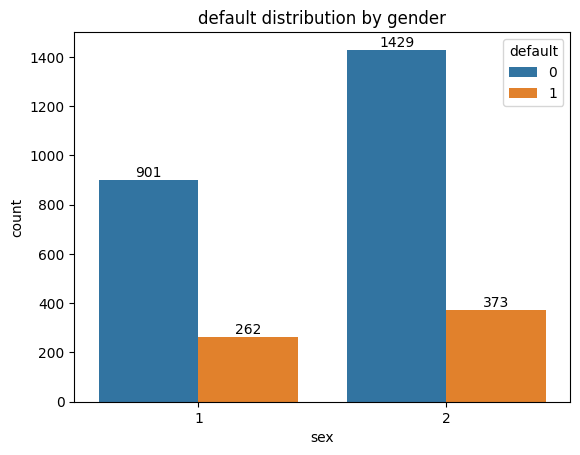

In [63]:
dg=sns.countplot(data=kredit,x='sex',hue=kredit['default']) # default berdasrkam jenis kelamin
plt.title('default distribution by gender')
for i in dg.containers:
    dg.bar_label(i,)

Baik laki-laki maupun permepun ternyata meiliki jumlah default yang mirip, karena itu kita akan lebih mendalami dengan menbahkan persebaran berdasrkan persebaran umur

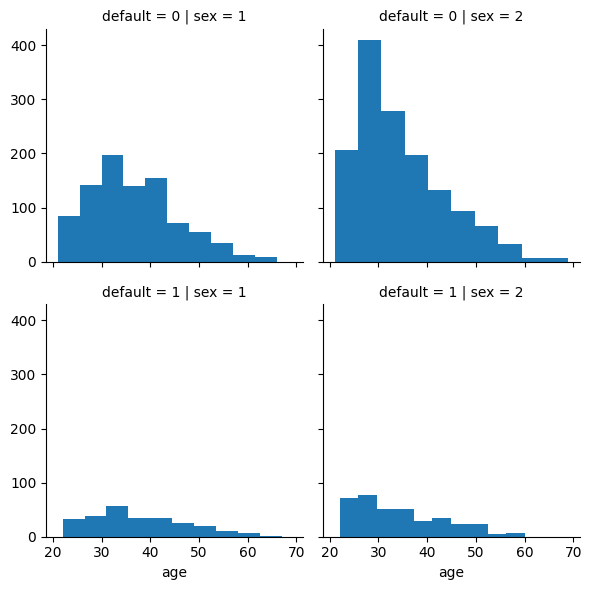

In [64]:
g=sns.FacetGrid(kredit, row='default', col='sex')# default berdasrkam jenis kelamin dan umur
g.map(plt.hist, 'age')


Ternyata  sebagaian besar default yang terjadi pada wanita terjadi antara  umur 20-30 tahun  , sedangkan untuk pria default terbanyak terjadi pada umur awal 30an,

Text(0.5, 1.0, 'Persebaran Default')

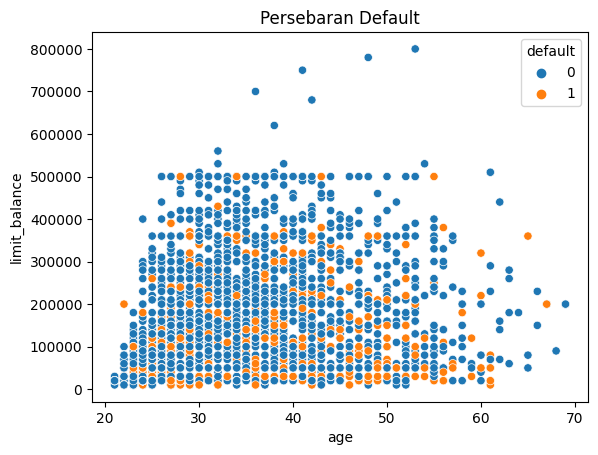

In [65]:
sns.scatterplot ( kredit ,x='age', y='limit_balance', hue='default')
plt.title('Persebaran Default')

Sebagian besar default terjadi pada limit di bawah 20.000

# 5. Data Preprocessing

## 1.Feature selection

Untuk featuree selection akan menggunakan korelasi dengan metode spearman karena dapat di gunakan untuk target categori  dan  dapat di gunakan kepada data yang meiiliki distribusi tidak normal ini juga termasuk kepda  outliers


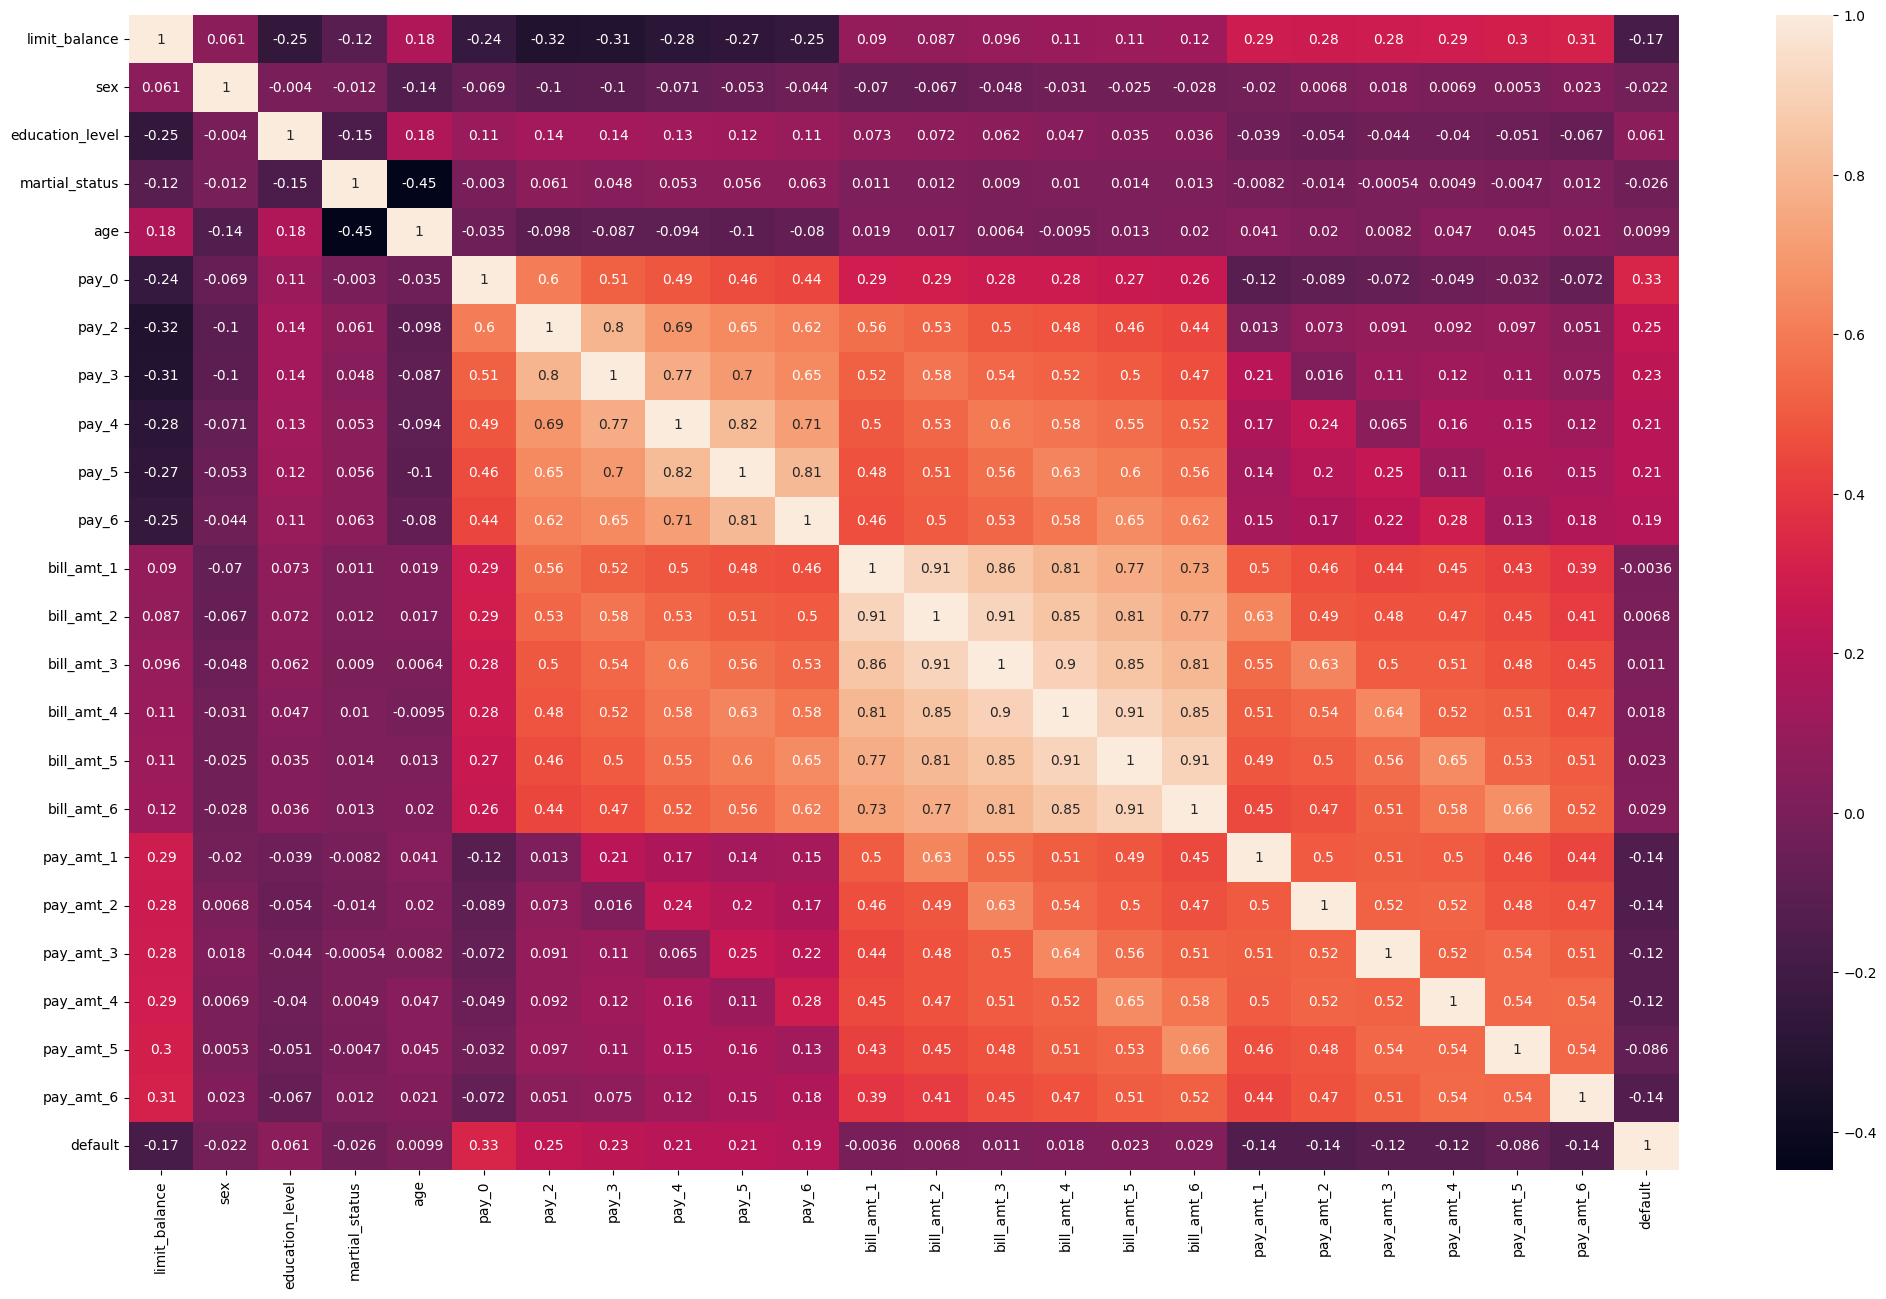

In [66]:
plt.figure(figsize = [25, 15])
sns.heatmap(kredit.corr(method='spearman'), annot = True);

## 2. Ouliers Handling

Handling outlers limit balance

limit_balance
median: 140000.0
mean: 163369.30860033727
mode: 50000.0
skew: 1.0004416437793326


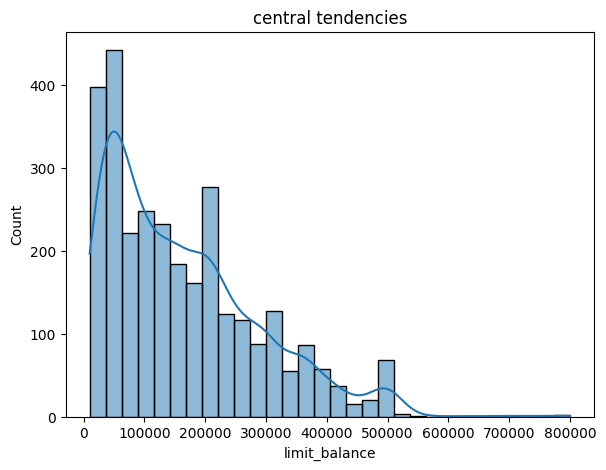

In [67]:
central_plot(kredit, 'limit_balance') # check kredit limit

In [68]:
q1=kredit['limit_balance'].quantile(0.25) # cek batas atas dan bawah
q3= kredit['limit_balance'].quantile(0.75)
iqr=q3-q1
ba = q3 + (1.5*iqr)
bb = q1 - (1.5*iqr)

print('batas atas' ,ba)
print('batas bawah', bb)

batas atas 500000.0
batas bawah -220000.0


limit_balance
median: 140000.0
mean: 163369.30860033727
mode: 50000.0
skew: 1.0004416437793326


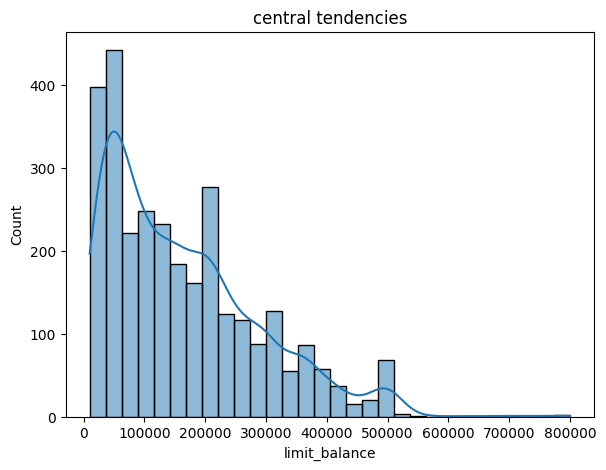

In [69]:
uber=kredit[(kredit['limit_balance']>bb)&(kredit['limit_balance']<ba)] ##remove value yang di luar bb& ba
central_plot(kredit, 'limit_balance') # check kredit limit

jadi yang dilih : limit balance , pay 0 sampai  pay 6 , pay_ammount 1 sampai pay_ammount 6

In [70]:
bersih=kredit[['limit_balance','pay_0','pay_2','pay_3','pay_4','pay_5','pay_6','pay_amt_1','pay_amt_2','pay_amt_3','pay_amt_4','pay_amt_5','pay_amt_6','default']] ## feature selection
bersih

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default
0,130000.0,0.0,0.0,0.0,0.0,0,0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
1,230000.0,0.0,0.0,0.0,0.0,0,0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
2,200000.0,0.0,0.0,0.0,0.0,0,0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
3,500000.0,0.0,0.0,0.0,0.0,0,0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
4,230000.0,0.0,0.0,0.0,0.0,0,0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,30000.0,-1.0,-1.0,2.0,-1.0,-1,-2,1860.0,0.0,1110.0,0.0,0.0,0.0,1
2961,20000.0,-1.0,-1.0,-1.0,-1.0,-1,-2,0.0,855.0,640.0,0.0,0.0,2742.0,0
2962,280000.0,-1.0,-1.0,-1.0,-1.0,-2,-2,0.0,930.0,0.0,0.0,0.0,0.0,0
2963,360000.0,-1.0,-1.0,-1.0,-1.0,-2,-2,463.0,2500.0,0.0,0.0,0.0,0.0,0


In [71]:
X_train=kredit[['limit_balance','pay_0','pay_2','pay_3','pay_4','pay_5','pay_6','pay_amt_1','pay_amt_2','pay_amt_3','pay_amt_4','pay_amt_5','pay_amt_6']] ## Pembagian X dan y
y_train=kredit['default']

# 6.Model Definition

Akan menggunakan 7 jenis model yaitu logistic regration , svm, decision tree , random forest , knn, naive bays , dan adaboost yang akan dibandingkan hasilnya unutk dilakuan model improvemnt untuk meningkatkan perfformnya lebih jauh

In [72]:
skaler=MinMaxScaler() ## menggunakan minmaxscaler karena range data yang besar

# Defining Logistic Regression Model
log_model = make_pipeline(skaler,LogisticRegression())
# Defining SVM Classifier Model
svm_model = make_pipeline(skaler, SVC())
# Defining Decision Tree Classifier Model
dt_model = make_pipeline(skaler,DecisionTreeClassifier(criterion='entropy',random_state=36))
# Defining Random Forest Classifier Model
rf_model = make_pipeline(skaler, RandomForestClassifier(random_state=36))
# Defining KNN Classifier Model
knn_model = make_pipeline(skaler,KNeighborsClassifier())
# Defining naive bayes Model
nb_model = make_pipeline(skaler,GaussianNB())
# Defining AdaBoost Classifier Model
ada_model = make_pipeline(skaler, AdaBoostClassifier())


naive: GaussianNB()

cek persebaran data target

In [73]:
kredit['default'].value_counts() ## cek persebaran

0    2330
1     635
Name: default, dtype: int64

ternayat data target tidak imbang

Untuk model evaluasi nya akan menggunakan stratified cross validation di mana tiap fold akan memabgi target dengan imbang

In [74]:
skfold=StratifiedKFold(n_splits=5) #membagi data menjadi 5 bagian dengan imbang

# 7. Model Training

Mentrain masing-masing model

In [75]:
cv_log_model = cross_val_score(log_model, X_train, y_train, cv=skfold, scoring="recall") #Mentrain masing-masing model
cv_svm_model = cross_val_score(svm_model, X_train, y_train, cv=skfold, scoring="recall")
cv_dt_model = cross_val_score(dt_model, X_train, y_train, cv=skfold, scoring="recall")
cv_rf_model = cross_val_score(rf_model, X_train, y_train, cv=skfold, scoring="recall")
cv_knn_model = cross_val_score(knn_model, X_train, y_train, cv=skfold, scoring="recall")
cv_nb_model = cross_val_score(nb_model, X_train, y_train, cv=skfold, scoring="recall")
cv_ada_model = cross_val_score(ada_model, X_train, y_train, cv=skfold, scoring="recall")

# 8.Model Evaluation

Jenis parameter yang di gunakan untuk model evaluation akan fokus pada recall . Recal akan fokus pada nilai false negative atau oarang yang kita prediksi tidak defult tapi ternyata default ini akan membuat kita mengalihkan fokus yang igin menurunkan tingkat default ke kelas lain yang seharusnya tidak mendapatkan perhatian kita.

In [76]:
name_model = [] ## Evalusai perbandingan model 
cv_scores=0
for cv,name in zip([cv_log_model,cv_svm_model,cv_dt_model,cv_rf_model,cv_knn_model,cv_nb_model,cv_ada_model],['log_model','svm_model','dt_model','rf_model','knn_model','nb_model','ada_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

log_model
recall - All - Cross Validation  :  [0.         0.01574803 0.50393701 0.37007874 0.11811024]
recall - Mean - Cross Validation :  0.2015748031496063
recall - Std - Cross Validation  :  0.20097104462763174
--------------------------------------------------
svm_model
recall - All - Cross Validation  :  [0.         0.         0.92125984 0.62204724 0.01574803]
recall - Mean - Cross Validation :  0.3118110236220472
recall - Std - Cross Validation  :  0.38724150076142383
--------------------------------------------------
dt_model
recall - All - Cross Validation  :  [0.01574803 0.2992126  1.         0.62992126 0.13385827]
recall - Mean - Cross Validation :  0.415748031496063
recall - Std - Cross Validation  :  0.3578443461969914
--------------------------------------------------
rf_model
recall - All - Cross Validation  :  [0.01574803 0.07086614 1.         0.64566929 0.04724409]
recall - Mean - Cross Validation :  0.3559055118110236
recall - Std - Cross Validation  :  0.3977554982886

Model terbaik yang kita dapat adalah Naive bays dengan score recall rata-rata 84% karena kita mengingnnkan model dapat meprediksi nilai default sebaik mungkin , selanjutnya akan melakukan hyper parameter tuning untuk meningkatkan performanya

# 9. Model Imporvement

Melakuakn model improvent dengan gridsearch

In [77]:
param_grid = {  "var_smoothing" : np.logspace(0,-9, num=100) } ##Hyperparameter tuning dengan gridsearch
grid_cv_nb=GridSearchCV (GaussianNB() , param_grid,scoring="recall")
grid_cv_nb.fit(X_train, y_train)
print('best params:', grid_cv_nb.best_params_)

best params: {'var_smoothing': 0.0015199110829529332}


In [78]:

cv_nb_mode_gs = cross_val_score(GaussianNB(var_smoothing = 0.0015199110829529332), X_train, y_train, cv=skfold, scoring="recall") ##Evalusai dengan hasil best param
print('recall - All - Cross Validation  : ', cv_nb_mode_gs)
print('recall - Mean - Cross Validation : ', cv_nb_mode_gs.mean())
print('recall - Std - Cross Validation  : ', cv_nb_mode_gs.std())

recall - All - Cross Validation  :  [0.94488189 0.95275591 0.93700787 0.90551181 0.90551181]
recall - Mean - Cross Validation :  0.9291338582677164
recall - Std - Cross Validation  :  0.019919859276651224


Peningkatan performa sekitar 9% dari mean score 84 menajdi 93

# 10. Model Infernece

kita akan mensave model yang ada untuk di inferance kan

In [80]:
inf_mdl = GaussianNB(var_smoothing = 0.0015199110829529332) # persiapan model untuk di save
num_columns = X_train.select_dtypes(include=np.number).columns.tolist() 
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()
skaler.fit(X_train)
inf_mdl.fit(X_train,y_train)

with open('inf_mdl.pkl', 'wb') as file_1: ## save model
  pickle.dump(inf_mdl, file_1)

with open('model_skaler.pkl', 'wb') as file_2:
  pickle.dump(skaler, file_2)

with open('list_num_cols.txt', 'w') as file_3:
  json.dump(num_columns, file_3)

with open('list_cat_cols.txt', 'w') as file_4:
  json.dump(cat_columns, file_4)

model inferance terlampir dengan nama h8dsft_P1M1_Gentur_Herlambang_inference

# 11. Pengambilan Kesimpulan

Berdasarkan eksplorasi  yang telah dilakuakn target utama kita berada pada range 20 sampai 30 tahun dengan Pendidikan utamanya lulusan universitas ini membuat prospek kedepanya cerah karena lulusan universitas memiliki carrer path yang lebih baik apabila di bandingkan dengan lulusan di bawahnya. Selain itu Sebagian besar ketrelambatan pembayaran  terjadi apda awal pembuatan kartu kredit.

Sedangkan unutk persebaran gender pengguna di dominasi oleh Wanita dengan 61% dan sisanya pria di 39% . Untuk default bagi Wanita paling bayak terjadi pada rentan usia 20 tahunan ini mungkin di karenakan pada usia tersebut para Wanita belum memliki gaji yang cukup besar tetapi sudah igin berbelanja , sedangkan untuk pria default terbanyak terjadi pada usia 30an ini mungkin karena pada usia tersebut adalah usia dimulainya keluarga sehingga mulai terjadi lonjakan penggeluaran , unutngnya baik dengan bertamabhanya usia baik untuk pria maupun Wanita tingkat default nya juga ikut turun. Sedangkan unutk default rate ada di sekitar 21.4% ini cukup tinggi karena global defult rate saat ini hanya berada apda 1 digit.

Sedangkan untuk feature selection yang akan digunakan untuk model adalah limit_balance, Pay_0-pay_6, dan pay_amt_1-pay_amt_6. Dan untuk model menggunakan 7 model yaitu : logistic regration, svm , decision tree, random forrest, knn,  naïve bays, dan ada booster , Yang akan di evalusai secara Stratified cross validation  dengan menggunakan parameter recall , karena kita ingin focus pada costumer yang akan default dan tidak dapat membayar tagihan creditnya. Setelah di lakukan uji coba ternyata model terbaik adalah naïve bays dengan tingkat recall rata-rata sebesar 84% dengan menggunakan hyper parameter tuning mendapatkan peningkatan performa sebesar 9% hingga menjadi 93% score recall nya.


Beberapa Imporevement / Take away  yang dapat dilakukan:
- mempermudah pembayaran agar di pay_0 tidak terjadi keterlambatan pembayaran.
- memperbaiki syarat kredit , karena default rate kita 2 digit sedangkan default rate global saat ini berada di 1 digit.
- Shift fokus target karena target utama kita saat ini berada pada di usia 20-30 tahun yang di mana usia paling rentan default.
- untuk improvement model selanjutnya dapat dengan meningkatkan hasil niali recall scorenya.

# Conceptual Problems

## 1. Apa yang dimaksud dengan criterion pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !

criterion adalah fungsi yang di gunakan untuk menghitung split/cabang pada sebuah nodes . criterion ada 3 yaitu "gini" yang membandingkan impurity , "entropy" ,dan "log_loss" yang menghitung information gain pada tiap nodes nya. 
criterion yang di gunakan pada model ini adalah "entropy" karena memiliki niali mean score tertinggi sebesar 84%.

## 2. Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll) !

pruning adalah metode yang di gunakan untuk menetukan internal nodes dengan leaf nodes pada tree based model , ini dilakukan agar model tidak mengalami overfitting karena membuat cabag terlalu banyak . ada dua jenis prruning yaitu :
- pre-pruning : menghentikan proses pruning dari awal dengan menset hyperparameter seperti : max_depth, min_sample_leaf , dan ,min_smaple_split  
- post-pruning : memotong model tree yang sudah dengan menset hyper parameter : ccp_alpha  

## 3. Bagaimana cara memilih K yang optimal pada KNN ?

Untuk memilih K yang optimal adalah dengan menghitung jumlah akar dari (n) sample di tarining dataset

## 4. Jelaskan apa yang dimaksud dengan Cross Validation 

Cross validation adalah tehnik pembagian train dan test secara merata untuk dataset untuk menguyarangi masalah over fitting karena semua bagian data menjadi train dan test bergatian , selain itu juga cross validation juga dapat menggabrkan performa model di luar dataset.

## 5. Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?

- Accuracy : adalah perbadingan anatara nilai yang benar dengan kesulurahan data , di gunakan apabila bersebaran data merata.
- Precision : adalah nilai prediksi poitif dengan jumlah positif aktualnya, digunakan apabila inigin fokus pada hasil prediksi positif atau menurunkan fasle positive. 
- Recall : adalah nialai prediksi negatif dengan jumlah negatif aktualnya , di gunakan apabila concernya hasil prediksi negatif atau igin meminimalisir false negative.
- f1 : nilai harmonic dari precision dan recall , di gunakan apabila persebaran data tidak normal atau igin fokus pada both prdiski postif dan negatif.